In [1]:
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import os
import cv2
import pandas as pd
from matplotlib.offsetbox import ( OffsetImage,
                                  AnnotationBbox)
from IPython.display import HTML # to show the animation in Jupyter
import warnings
warnings.simplefilter(action='ignore')

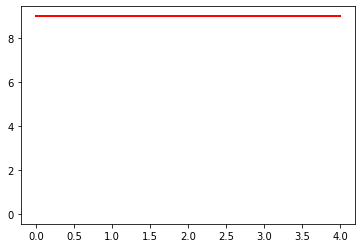

In [2]:
fig, ax = plt.subplots() # creating my fig
camera = Camera(fig)# the camera gets the fig we'll plot
for i in range(10):
    ax.plot([i]* 5, c='red',linewidth=2) # 5 element array from 0 to 9
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation

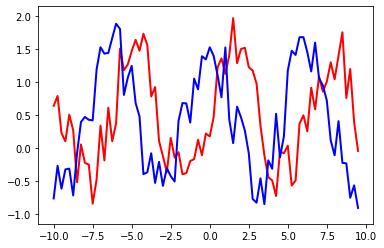

In [3]:
fig, ax = plt.subplots() # creating my fig
camera = Camera(fig)# the camera gets the fig we'll plot
x  =  np.arange(-10,10,0.25)
y = np.sin(x)
z  =  np.cos(x)
for i in range(len(x)):
    ax.plot(x[:i],y[:i]+ 1.002*np.random.random(size=i),color="red",linewidth=2) # 5 element array from 0 to 9
    ax.plot(x[:i],  z[:i]+1.002*np.random.random(size=i),color="blue",linewidth=2) # 5 element array from 0 to 9
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation

In [100]:
animation.save('animation_motion.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [101]:
!ffmpeg -i animation_motion.mp4 -filter:v fps=fps=30 animation_motion.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

# Evolution Plot

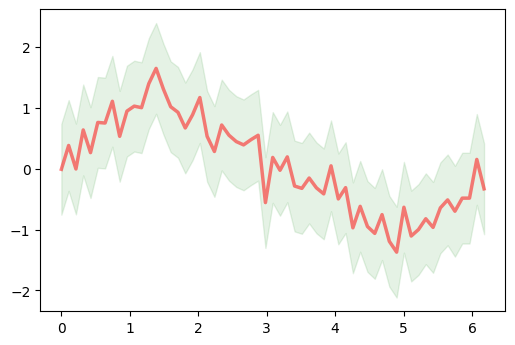

In [4]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
x = np.linspace(0, np.pi*2, 60) # a sine circle
y = np.sin(x) + np.random.normal(0.01,0.32,len(x)) # sine
y1 =  y -  np.std(y)
y2 =  y + np.std(y)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = y[:i] # current sine
    ax.plot(x_t, y_t, 'r',alpha=0.5,linewidth=2.5,)
#     axes.plot(x,y, color='blue', alpha=0.5,linewidth=2.5,label="Sin(x)+Noise")
    ax.fill_between(x[:i], y1[:i], y2[:i],color="green",alpha=0.1)
    camera.snap()
animation = camera.animate(blit=False, interval=40)
HTML(animation.to_html5_video())

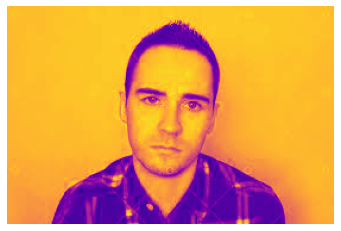

In [6]:
import os
path = './basedata/test'
basepath  =  os.getcwd()
basepath =  os.path.join(basepath,path)
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
for img in os.listdir(path):
    if(img.endswith('.jpg')):
        file =  os.path.join(basepath,img)
        img_obj = plt.imread(file)
        ax.imshow(img_obj[:,:,0],cmap=plt.cm.plasma)
        camera.snap()
plt.axis('off')
animation = camera.animate(blit=False, interval=240)
HTML(animation.to_html5_video())

In [97]:
animation.save('animation_moods.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [98]:
!ffmpeg -i animation_moods.mp4 -filter:v fps=fps=30 animation_moods.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

## Using dynamic labels and titles

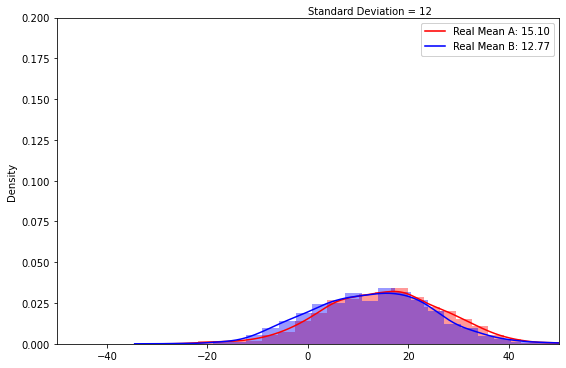

In [89]:
std = 3 # start std 
Am = 15. # mean of first normal
Bm = 12.5 # mean of second normal
fig, ax = plt.subplots(figsize=(9,6)) # empty fig
camera = Camera(fig)
for j in range(10):
    plt.ylim((0, 0.2)) # setting up the limits (or else it will auto ajust
    plt.xlim((-50, 50))
    
    A = np.random.normal(Am, std, size=(1000)) # creating the 1000-sized normals
    B = np.random.normal(Bm, std, size=(1000))    
    A_plot = sns.distplot(A, color='red') 
    B_plot = sns.distplot(B, color='blue')
    plt.legend(( 
        'Real Mean A: {:.2f}'.format(np.mean(A)),
        'Real Mean B: {:.2f}'.format(np.mean(B))
    ))
        
    ax.text(0.5, 1.01, "Standard Deviation = "+str(std), transform=ax.transAxes) # making the dynamic title
    camera.snap() # camera snapshot
    
    std += 1 # incrementing the std
anim = camera.animate() # animating the plots
HTML(anim.to_html5_video())

In [90]:
anim.save('animation_dens.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [91]:
!ffmpeg -i animation_dens.mp4 -filter:v fps=fps=30 animation_dens.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

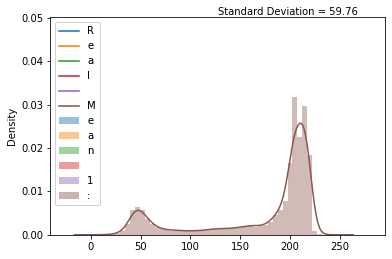

In [93]:
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
for img in os.listdir(path):
    if(img.endswith('.jpg')):
        file =  os.path.join(basepath,img)
        img_obj = plt.imread(os.path.join(file))
        std =  img_obj.reshape(-1,1).std()
        mean = img_obj.reshape(-1,1).mean()
        A_plot = sns.distplot(img_obj.reshape(-1,1)) 
        clas =  file.split('/')[-1].split('.')[0]
        plt.legend(f'Real Mean {clas}: {mean:.2f}')
        
        ax.text(0.5, 1.01, "Standard Deviation = "+str(np.round(std,2)), transform=ax.transAxes) # making the dynamic title
        camera.snap() # camera snapshot
    
animation = camera.animate(blit=False, interval=620)
HTML(animation.to_html5_video())

In [94]:
animation.save('animation_pics.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [95]:
!ffmpeg -i animation_pics.mp4 -filter:v fps=fps=30 animation_pics.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

In [126]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
def getImage(path, new_size = 20):
    # return OffsetImage(plt.imread(path))
    img = Image.open(path)
    img.thumbnail((new_size, new_size), Image.BILINEAR)  # resizes image in-place

    return OffsetImage(img)

/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/./basedata/test/4.jpg


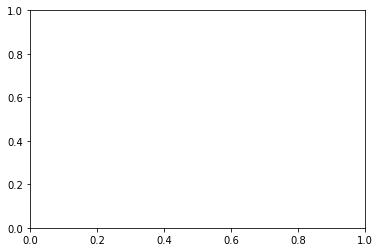

In [131]:
fig, ax = plt.subplots()
for img in os.listdir(path):
    if(img.endswith('.jpg')):
        file =  os.path.join(basepath,img)
        print(file)
        print(getImage(file))
        break

In [41]:
import os
path = './basedata/test'
basepath  =  os.getcwd()
basepath =  os.path.join(basepath,path)

<Figure size 1200x720 with 0 Axes>

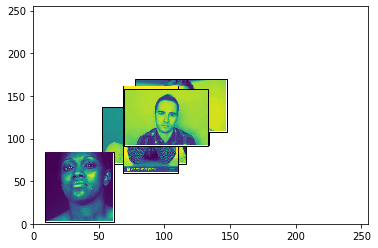

In [61]:
annotate(basepath)

<Figure size 1200x720 with 0 Axes>

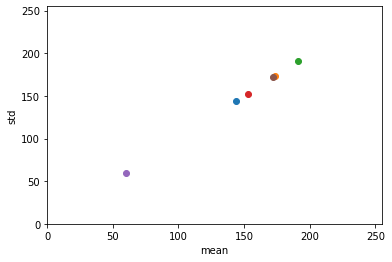

In [62]:
res  = scatter(basepath)

In [48]:
res

,mean,std,class
0,143.656089,143.656089,4
1,173.419281,173.419281,5
2,191.273531,191.273531,6
3,152.589725,152.589725,2
4,59.961558,59.961558,3
5,172.170777,172.170777,1


In [ ]:
base = '/content/COVID-19_Radiography_Dataset'
paths   = os.listdir(base)

In [ ]:
# We are creating our test set
if os.path.isdir(path) is True:
    paths   = os.listdir(base)
    pr =  10.
    for k in range(len(paths)):
        if os.path.isdir(os.path.join(base,paths[k])):
            n = np.int(len(os.listdir(os.path.join(base,paths[k]))) * pr)
            for c in random.sample(glob.glob(os.path.join(base,paths[k]+'/'+paths[k]+'*')),n):
                shutil.move(c,os.path.join(test_path,paths[k]))

In [261]:
basepath = os.path.join(os.getcwd(),'basedata/Normal')
basepath

'/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/basedata/Normal'

<Figure size 1200x720 with 0 Axes>

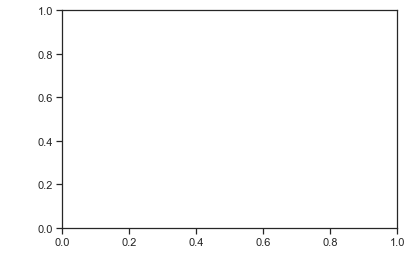

In [290]:

plt.figure(figsize=(10,6),dpi=120)
fig, ax = plt.subplots()
camera = Camera(fig)# the camera gets our figure
ls = {'path':[],'imageid':[],'class':[],'mean':[],'std':[],'min':[],'max':[]}
for f in os.listdir(basepath):
    if(f.endswith('.png')):
        file =  os.path.join(basepath,f)
        arr_img = cv2.imread(file)
        mean = arr_img.mean()
        std = arr_img.std()
        minimum = arr_img.min()
        maximum = arr_img.max()
        xy = [mean,std]
        imagebox = OffsetImage(arr_img, zoom=0.1)
        imagebox.image.axes = ax
        ab = AnnotationBbox(imagebox, xy,xycoords='data',boxcoords="offset points",pad=0.1)
        ax.add_artist(ab)
        clas =  f.split('/')[-1].split('.')
        classes =  clas[0].split('-')[0]
        imid =  clas[0].split('-')[1]
        ls['path'].append(file)
        ls['imageid'].append(imid)
        ls['class'].append(classes)
        ls['mean'].append(mean)
        ls['std'].append(std)
        ls['min'].append(minimum)
        ls['max'].append(maximum)
        camera.snap() # camera snapshot

# plt.xlim(0,1)
# plt.ylim(0,1)
plt.show()
anim = camera.animate() # animating the plots
HTML(anim.to_html5_video())

In [272]:
df  = pd.DataFrame(ls)
df.head()

,path,imageid,class,mean,std,min,max
0,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,1175,COVID,148.214215,65.081377,0,250
1,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,3010,COVID,139.305791,54.203604,0,236
2,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,101,Lung_Opacity,118.793257,42.925212,0,195
3,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,10065,Normal,112.781009,71.333628,0,248
4,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,2118,COVID,145.664970,56.031820,0,255


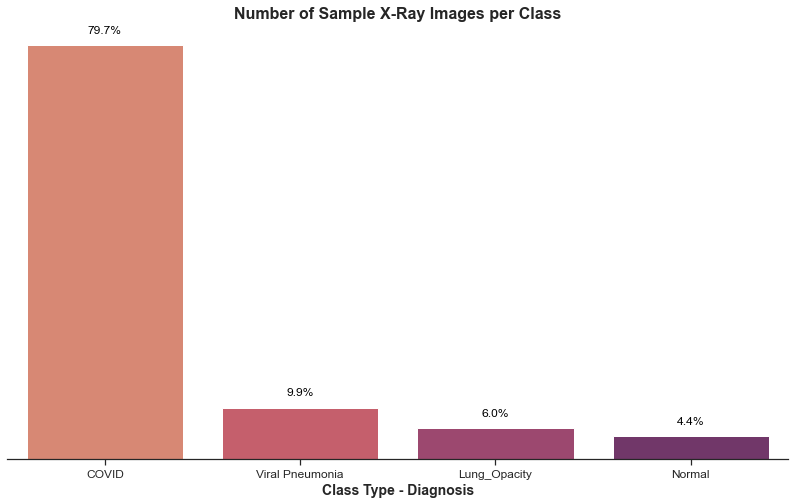

In [273]:
samples,features = df.shape
#Samples per class
plt.figure(figsize=(14,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data = df,x='class',order = df['class'].value_counts().index,palette="flare")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Class Type - Diagnosis',fontsize = 14,weight = 'bold')
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False) 
plt.title('Number of Sample X-Ray Images per Class', fontsize = 16,weight = 'bold');


for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/samples)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
    ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
    textcoords='offset points')

In [274]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

In [275]:
df.head()

,path,imageid,class,mean,std,min,max,image
0,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,1175,COVID,148.214215,65.081377,0,250,"[[6, 7, 10, 12, 15, 15, 16, 14, 17, 18, 13, 12..."
1,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,3010,COVID,139.305791,54.203604,0,236,"[[42, 42, 39, 38, 44, 54, 63, 70, 75, 79, 81, ..."
2,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,101,Lung_Opacity,118.793257,42.925212,0,195,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,..."
3,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,10065,Normal,112.781009,71.333628,0,248,"[[5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,..."
4,/Users/yusuf/Desktop/AIMS/Research/Lab/Experim...,2118,COVID,145.664970,56.031820,0,255,"[[25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, ..."


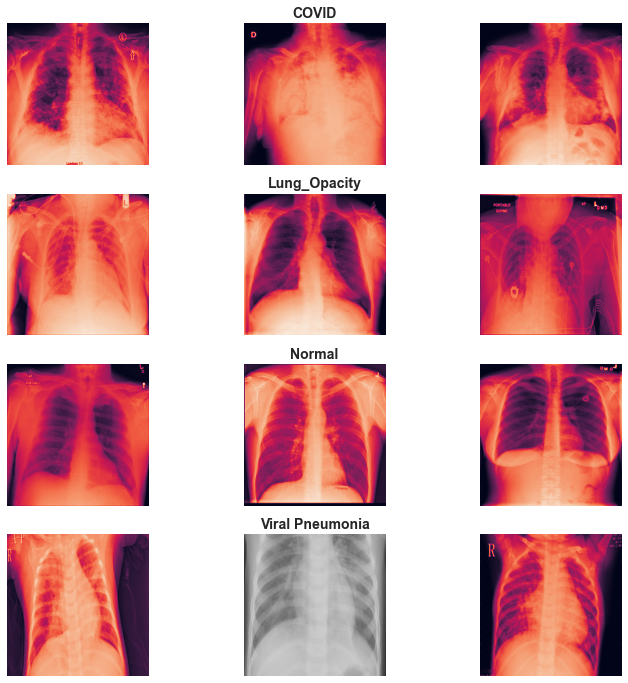

In [276]:
n_samples = 3

fig, m_axs = plt.subplots(4, n_samples, figsize = (4*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs,df.sort_values(['class']).groupby('class')):
    n_axs[1].set_title(type_name,fontsize = 14,weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):       
        picture = c_row['path']
        image = plt.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

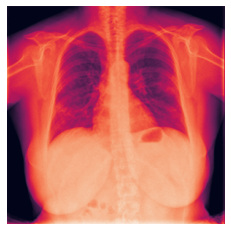

In [277]:
import random 
plt.figure()
pic_id = random.randrange(0, samples)
picture = df['path'][pic_id]
image = plt.imread(picture)
plt.imshow(image)
plt.axis('off');
plt.show()      

In [278]:
print('Shape of the image : {}'.format(image.shape))
print('Image Hight {}'.format(image.shape[0]))
print('Image Width {}'.format(image.shape[1]))
print('Dimension of Image {}'.format(image.ndim))
print('Image size {}'.format(image.size))
print('Image Data Type {}'.format(image.dtype))
print('Maximum RGB value in this image {}'.format(image.max()))
print('Minimum RGB value in this image {}'.format(image.min()))

Shape of the image : (299, 299)
Image Hight 299
Image Width 299
Dimension of Image 2
Image size 89401
Image Data Type float32
Maximum RGB value in this image 0.9490196108818054
Minimum RGB value in this image 0.0


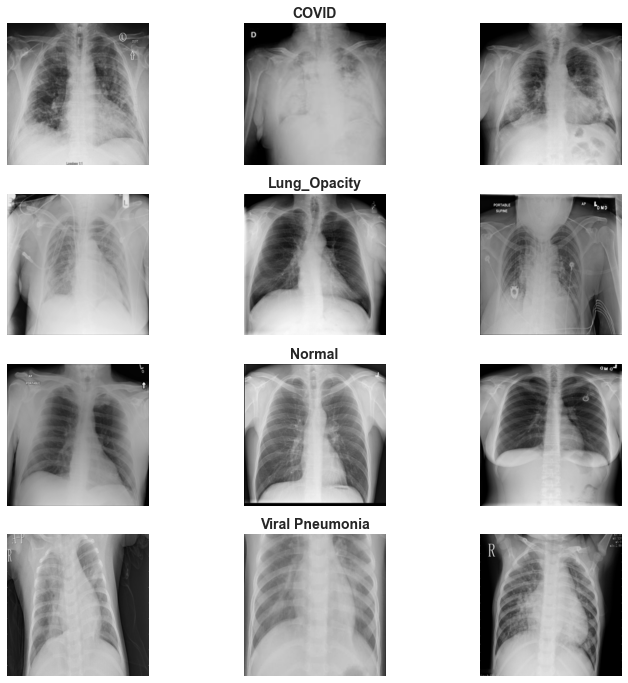

In [280]:
#Image Sampling

#Image Sampling
n_samples = 3

fig, m_axs = plt.subplots(4, n_samples, figsize = (4*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs,df.sort_values(['class']).groupby('class')):
    n_axs[1].set_title(type_name,fontsize = 14,weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

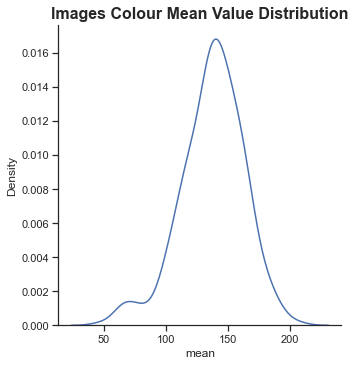

In [281]:
ax = sns.displot(data = df, x = 'mean', kind="kde");
plt.title('Images Colour Mean Value Distribution', fontsize = 16,weight = 'bold');

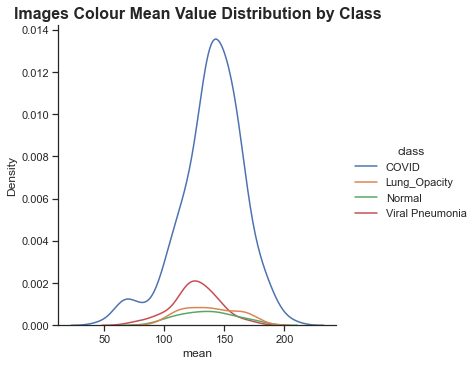

In [282]:
ax = sns.displot(data = df, x = 'mean', kind="kde", hue = 'class');
plt.title('Images Colour Mean Value Distribution by Class', fontsize = 16,weight = 'bold');

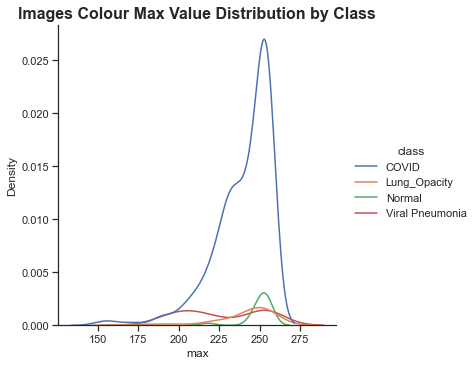

In [283]:
ax = sns.displot(data = df, x = 'max', kind="kde", hue = 'class');
plt.title('Images Colour Max Value Distribution by Class', fontsize = 16,weight = 'bold');

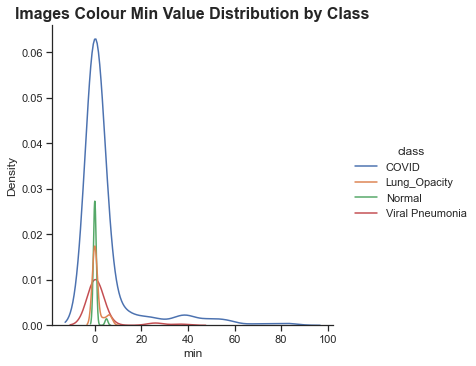

In [284]:
ax = sns.displot(data = df, x = 'min', kind="kde", hue = 'class');
plt.title('Images Colour Min Value Distribution by Class', fontsize = 16,weight = 'bold');

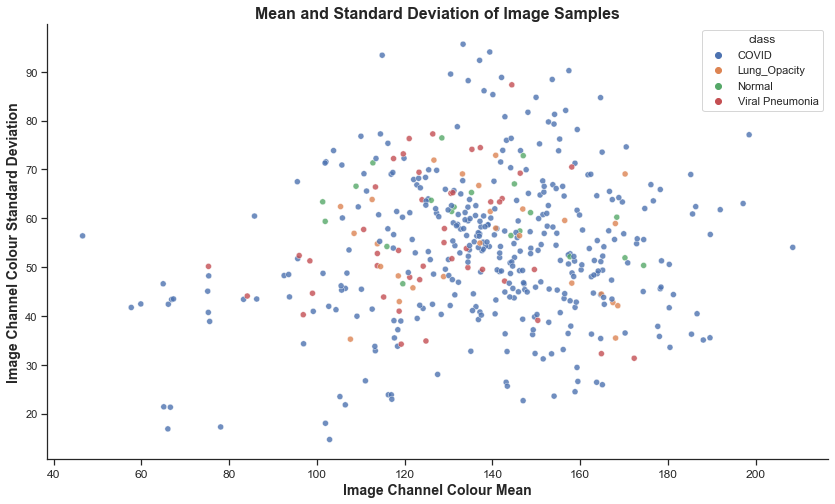

In [289]:
plt.figure(figsize=(14,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.scatterplot(data=df, x="mean", y=df['std'], hue = 'class',alpha=0.8);
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Image Channel Colour Mean',fontsize = 14,weight = 'bold')
ax.set_ylabel('Image Channel Colour Standard Deviation',fontsize = 14,weight = 'bold')
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16,weight = 'bold');

AttributeError: 'numpy.ndarray' object has no attribute 'legend_'

<Figure size 1008x576 with 0 Axes>

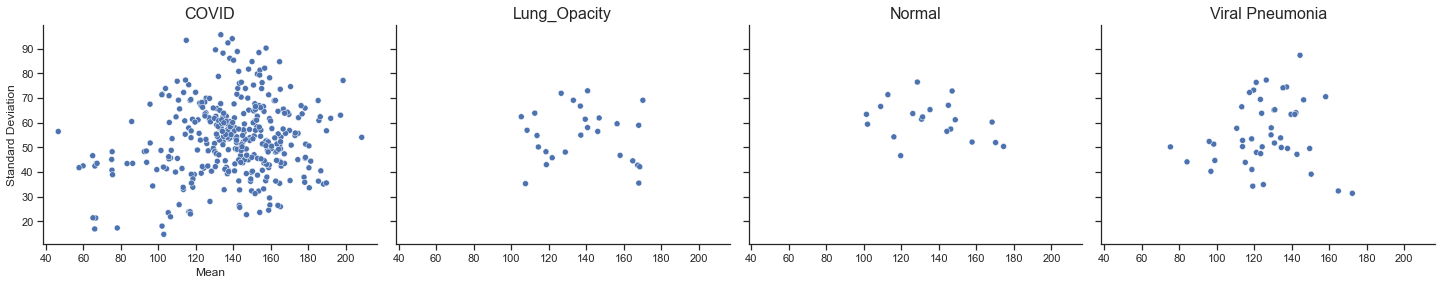

In [288]:
plt.figure(figsize=(14,8))
g = sns.FacetGrid(df, col="class",height=5);
g.map_dataframe(sns.scatterplot, x='mean', y='std',hue = 'class');
g.set_titles(col_template="{col_name}", row_template="{row_name}", size = 16)
g.fig.subplots_adjust(top=.7)
# g.fig.suptitle('Mean and Standard Deviation of Image Samples',fontsize=16, weight = 'bold')
axes = g.axes.flatten()
axes[0].set_ylabel('Standard Deviation');
# camera = Camera(g)# the camera gets our figure
for ax in axes:
    ax.set_xlabel('Mean')
#     camera.snap() # camera snapshot
g.fig.tight_layout()

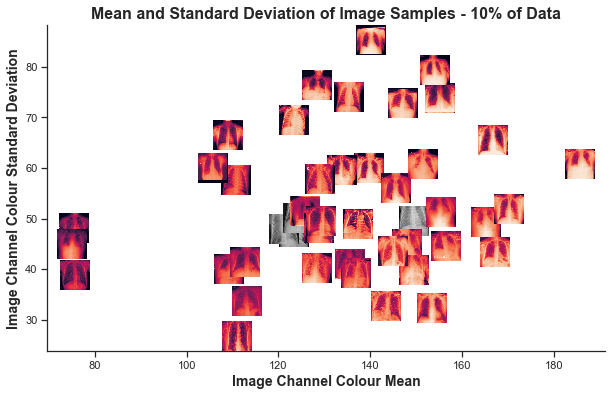

In [287]:
def getImage(path):
    imdata = plt.imread(path)
    return OffsetImage(imdata,zoom = 0.1)

DF_sample = df.sample(frac=0.1, replace=False, random_state=1)
paths = DF_sample['path']

fig, ax = plt.subplots(figsize=(10,6))
ab = sns.scatterplot(data=DF_sample, x="mean", y='std')
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Image Channel Colour Mean',fontsize = 14,weight = 'bold')
ax.set_ylabel('Image Channel Colour Standard Deviation',fontsize = 14,weight = 'bold')
plt.title('Mean and Standard Deviation of Image Samples - 10% of Data', fontsize = 16,weight = 'bold');

for x0, y0, path in zip(DF_sample['mean'], DF_sample['std'],paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)